In [15]:
#-------------------------------------------
# Talha Shahzad
# 21i-0540
# Section: C
# Assignment 3
#-------------------------------------------

In [16]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az

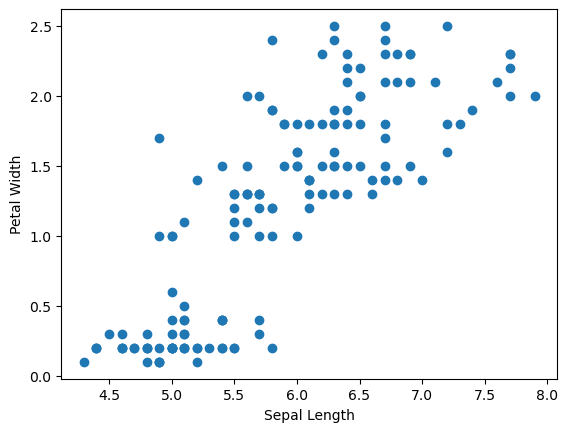

In [17]:
# reading the whole iris dataset csv and storing in data
data = pd.read_csv("C:/Users/Talha/Downloads/iris.csv")

#storing the individual values of each column in datastructure 
sepal_length=data['SepalLengthCm'].values
petal_length=data['PetalLengthCm'].values
petal_width=data['PetalWidthCm'].values

#displaying the data in scatter point form
plt.scatter(sepal_length,petal_width,label="Sepal Length and Petal Width")
# displaying the Independent variable Sepal Length on x-axis
plt.xlabel("Sepal Length")
# displaying the dependent variable Petal width on y-axix
plt.ylabel("Petal Width")
plt.show()


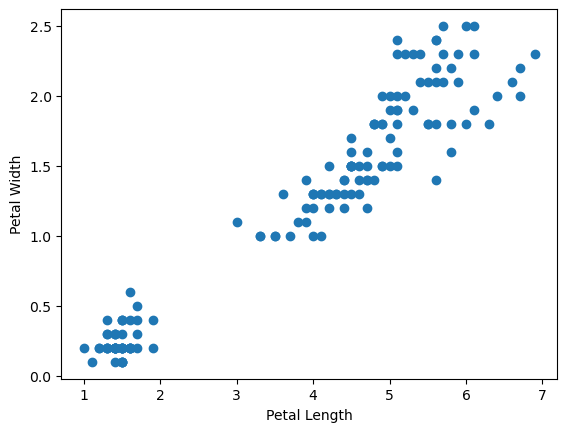

In [18]:
#displaying the data in scatter point form
plt.scatter(petal_length,petal_width,label="Petal Length and Petal Width")
# displaying the Independent variable Petal Length on x-axis
plt.xlabel("Petal Length")
# displaying the dependent variable Petal width on y-axix
plt.ylabel("Petal Width")
plt.show()

In [19]:
#-----------------------------------------------------------------------------
# MULTIPLE LINEAR REGRESSION MODEL
#-----------------------------------------------------------------------------

In [20]:

X = np.column_stack((sepal_length, petal_length))
X_mean = X.mean(0)
X_centered = X - X_mean

with pm.Model() as model:
    α_tmp = pm.Normal('α_tmp', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α_tmp + pm.math.dot(X_centered, β)
    α = pm.Deterministic('α', α_tmp - pm.math.dot(X_mean, β))
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=petal_width)
    trace = pm.sample(2000)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α_tmp]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 46 seconds.
The acceptance probability does not match the target. It is 0.898199040702704, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

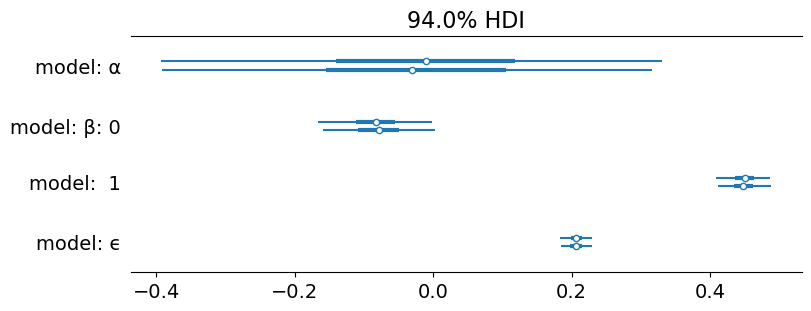

In [21]:
varnames = ['α', 'β', 'ϵ']
az.plot_forest([trace], model_names=['model'], var_names=varnames,
 combined=False, colors='cycle', figsize=(8, 3))

In [22]:
az.summary(trace, var_names=varnames)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.018,0.189,-0.393,0.326,0.004,0.003,2151.0,2215.0,1.0
β[0],-0.081,0.043,-0.162,0.002,0.001,0.001,1950.0,2062.0,1.0
β[1],0.449,0.021,0.410,0.487,0.000,0.000,1932.0,1988.0,1.0
ϵ,0.207,0.012,0.184,0.230,0.000,0.000,3179.0,2395.0,1.0


In [23]:
#-----------------------------------------------------------------------------
# CONFOUNDING VARIABLE MODEL
#-----------------------------------------------------------------------------

In [24]:
# Applying models using both independent variable 
with pm.Model() as model_SepalLength_PetalLength:
    # Calculating the priors for models
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    # adding some uncertain data using cauchy
    ϵ = pm.HalfCauchy('ϵ', 5)
    # Applying the formula of Multi linear regression
    μ = α + β1 * sepal_length + β2 * petal_length
    # Predicting the values by applying normal distribution
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=petal_width)
    trace_SepalLength_PetalLength = pm.sample(2000)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β2, β1, α]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 76 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [25]:
#Applying the model using only one independent variable Sepal Length
with pm.Model() as model_SepalLength:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    #adding uncertainity to the data
    ϵ = pm.HalfCauchy('ϵ', 5)
    #applying the formula of multi regression using single varaible
    μ = α + β1 * sepal_length
     # Predicting the values by applying normal distribution
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=petal_width)
    trace_SepalLength = pm.sample(2000)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β1, α]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 89 seconds.


In [26]:
#Applying the model using only one independent variable Petal length
with pm.Model() as model_PetalLength:
    α = pm.Normal('α', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    #adding uncertainity to the data
    ϵ = pm.HalfCauchy('ϵ', 5)
    #applying the formula of multi regression using single varaible
    μ = α + β2 * petal_length
    # Predicting the values by applying normal distribution
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=petal_width)
    trace_PetalLength = pm.sample(2000)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β2, α]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 53 seconds.


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

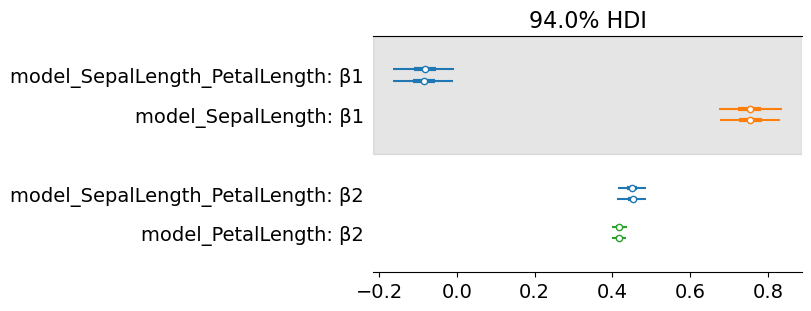

In [27]:
# using the plot forest function to plot the each traces individually
# plotting each model with both the variables individually
az.plot_forest([trace_SepalLength_PetalLength, trace_SepalLength, trace_PetalLength],
 model_names=['model_SepalLength_PetalLength', 'model_SepalLength', 'model_PetalLength'],
 var_names=['β1', 'β2'],
 combined=False, colors='cycle', figsize=(8, 3))


In [28]:
print("--**Displaying the summary of Multi-linear Regression with multiple independent variable**--");
pm.summary(trace_SepalLength_PetalLength)

--**Displaying the summary of Multi-linear Regression with multiple independent variable**--


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.007,0.184,-0.350,0.337,0.006,0.004,883.0,1390.0,1.0
β1,-0.084,0.042,-0.165,-0.008,0.001,0.001,838.0,1228.0,1.0
β2,0.451,0.020,0.412,0.485,0.001,0.000,995.0,1508.0,1.0
ϵ,0.207,0.012,0.185,0.229,0.000,0.000,1411.0,1410.0,1.0


In [29]:
print("--**Displaying the summary of Multi-linear Regression with individual independent varaible**--");
pm.summary(trace_PetalLength)

--**Displaying the summary of Multi-linear Regression with individual independent varaible**--


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.368,0.042,-0.442,-0.284,0.001,0.001,1381.0,1682.0,1.0
β2,0.417,0.010,0.399,0.436,0.000,0.000,1358.0,1669.0,1.0
ϵ,0.209,0.012,0.186,0.231,0.000,0.000,2200.0,2096.0,1.0


In [30]:
print("--**Displaying the summary of Multi-linear Regression with individual independent varaible**--");
pm.summary(trace_SepalLength)

--**Displaying the summary of Multi-linear Regression with individual independent varaible**--


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-3.207,0.258,-3.703,-2.748,0.007,0.005,1501.0,1545.0,1.0
β1,0.754,0.044,0.677,0.837,0.001,0.001,1480.0,1598.0,1.0
ϵ,0.442,0.027,0.395,0.493,0.001,0.000,1382.0,933.0,1.0


In [31]:
#   EXPLANATION
#-------------------------------------------------------------
# it can be seen that the effect Sepal length beta values on model is negative or close to zero
# which tells us that the Sepal length is a confiunding variable
# Which in turns was making our prediction goes wrong in multi linear regression
# Furthermore the coreelation between Sepal Length and Petal Length is high which in term is Multi colinearity
#--------------------------------------------------------------

In [32]:
#-----------------------------------------------------
#  MULTI COLINEARITY 
#-----------------------------------------------------

In [33]:
#changing the both independent variable into versicular matrix for easy calculation
X = np.vstack((sepal_length, petal_length)).T
with pm.Model() as model:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α + pm.math.dot(X, β)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=petal_width)
    trace = pm.sample(2000)


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 77 seconds.
There were 83 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7120902164367711, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<Axes: xlabel='β\n0', ylabel='β\n1'>

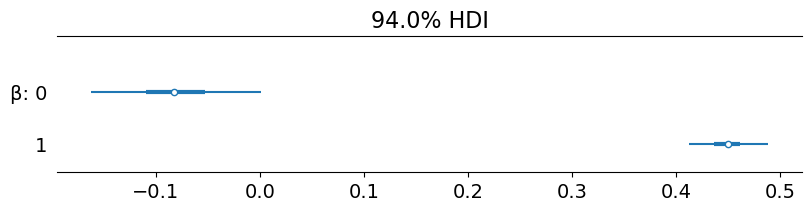

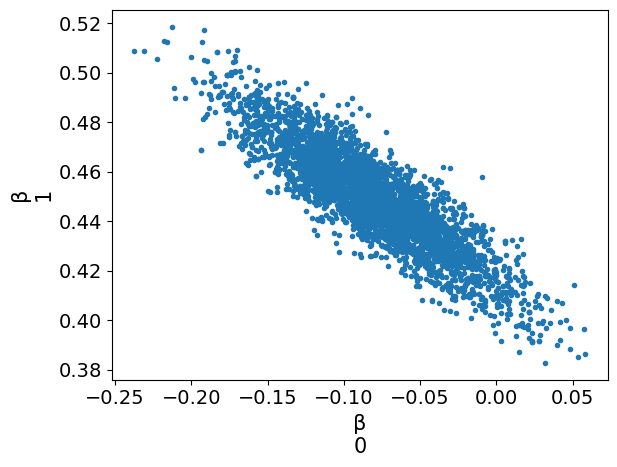

In [36]:
# plotting both the independent variable to check their corelation
az.plot_forest(trace, var_names=['β'], combined=True, figsize=(8,2))
#plotting the data in scatter form to make it easy to visualize
az.plot_pair(trace, var_names=['β'])

In [35]:
#  EXPLANATION
#------------------------------------------------------
# It can be seen that if one variable increase the other variable decrease 
# Hence there exist a high negative correlation between the both independent variable
# Due to which our model prediction is becoming wrong
#-------------------------------------------------------